# Zomato Data Analysis Project

##Important Liberaries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

working_directory=os.getcwd()
path=working_directory+"/Zomatodata.csv"
data=pd.read_csv(path)
print(data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
#view dataframe that you loaded
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [14]:
#convert the data type of coloum- rate

def handlerate(value):
    value=str(value).split("/")
    value=value[0];
    return float(value)

data["rate"]=data["rate"].apply(handlerate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [16]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Type of resturants

In [17]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


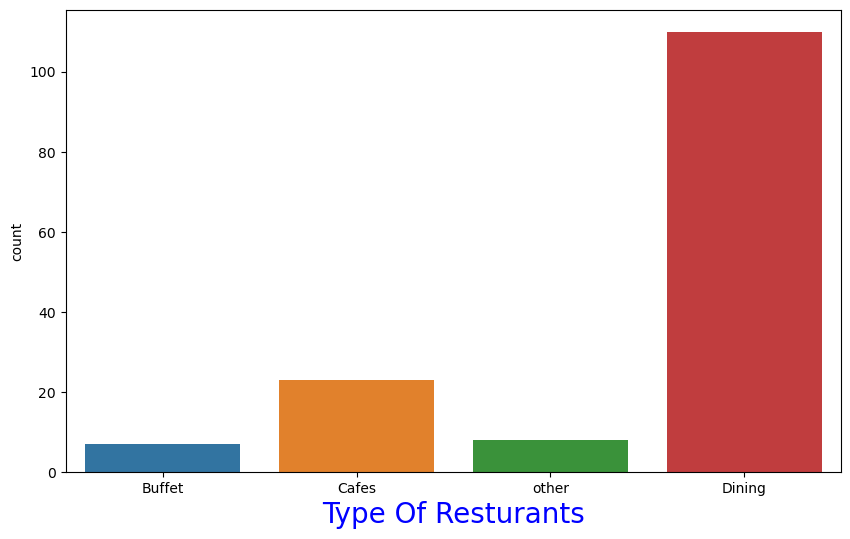

In [25]:
fig=plt.figure(figsize=(10,6))

ax=sns.countplot(x=data["listed_in(type)"])
plt.xlabel("Type Of Resturants",size=20,color="blue")
plt.show()

Conclusion- Majority of the resturants falls in dinning category

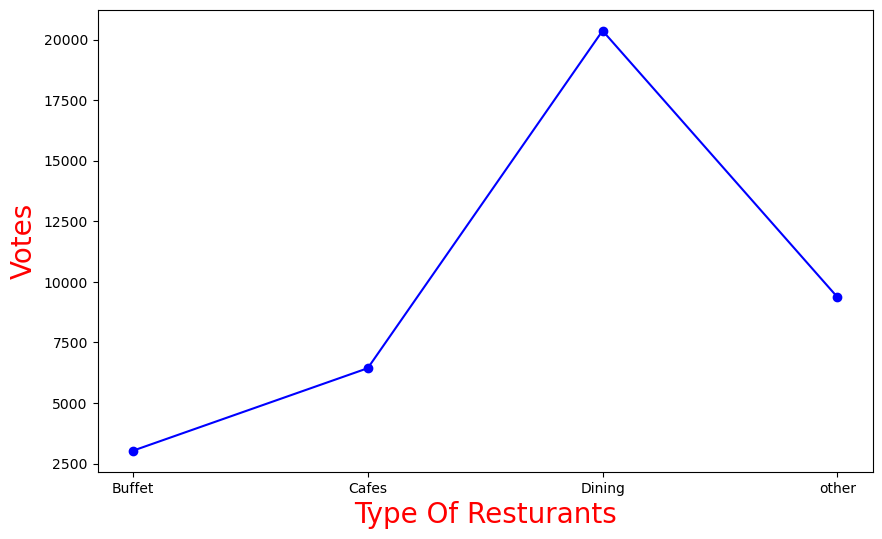

In [24]:
group_data=data.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":group_data})

fig=plt.figure(figsize=(10,6))

ax=plt.plot(result, color="blue", marker="o")
plt.xlabel("Type Of Resturants", color="red", size=20)
plt.ylabel("Votes", color="red", size=20)
plt.show()

Conclusion- Dinning resturants receive maximum numbers of votes

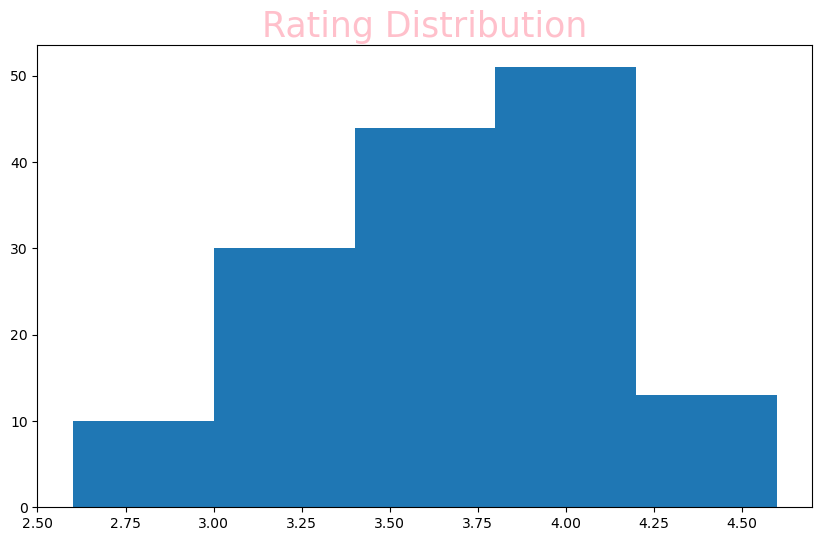

In [38]:
fig=plt.figure(figsize=(10,6))

plt.title("Rating Distribution", c="pink", size=25)
ax=plt.hist(data["rate"],bins=5)
plt.show()

Conclusion- The majority resturants receive rating from 3.5 to 4.

# Average Order Spending By Couples

In [40]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


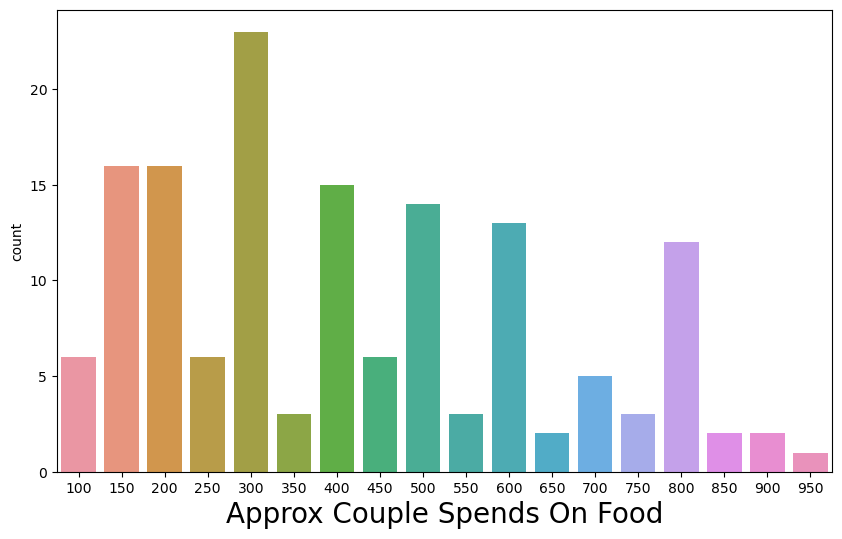

In [43]:
couple_data=data["approx_cost(for two people)"]

fig=plt.figure(figsize=(10,6))

ax=sns.countplot(x=couple_data)
plt.xlabel("Approx Couple Spends On Food", size=20)
plt.show()

Conclusion- Majority of couples prefer resturants with an approximate cost of 300 rupees

# Which mode recevice maximun rating 

In [44]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


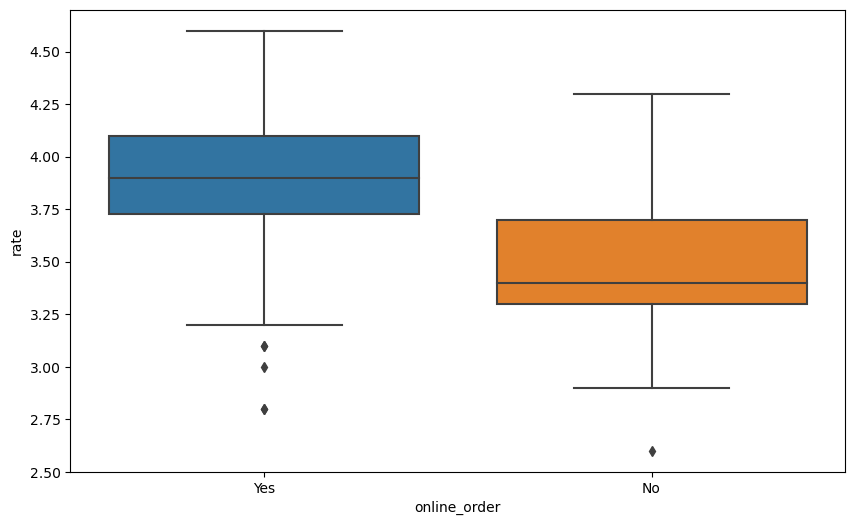

In [46]:
fig=plt.figure(figsize=(10,6))

ax=sns.boxplot(x="online_order", y="rate", data=data)

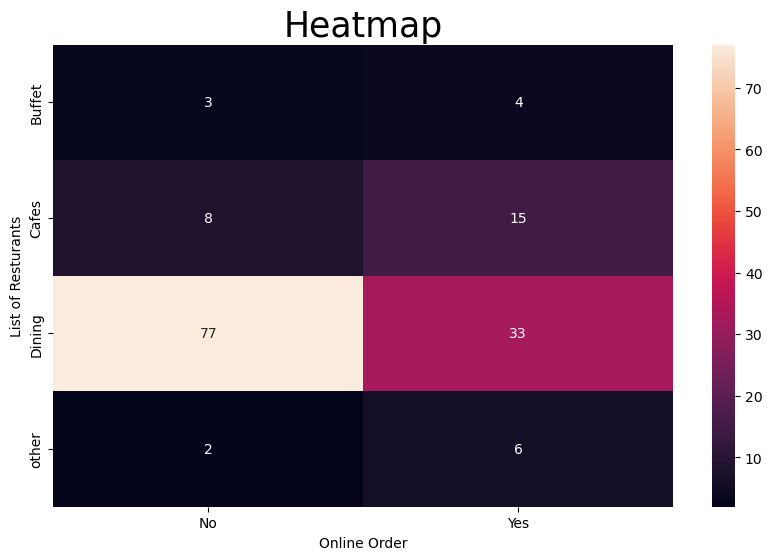

In [56]:
pivot_table=data.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
fig=plt.figure(figsize=(10,6))

ax=sns.heatmap(pivot_table, annot=True, fmt="d")
plt.title("Heatmap", size=25)
plt.xlabel("Online Order")
plt.ylabel("List of Resturants")
plt.show()